# Analyzing Historical Stock/Revenue Data and Building a Dashboard

## Importing Libraries

In [2]:
import yfinance as yf
import pandas as pd
import json
import requests
from bs4 import BeautifulSoup

## Extracting Tesla Stock Data Using yfinance

In [12]:
tesla = yf.Ticker("TSLA")
tesla_stock = tesla.history(period="max")
tesla_stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Extracting Tesla Revenue Data Using Webscraping

### First way:

In [21]:
Url = "https://companiesmarketcap.com/tesla/revenue/"
data = requests.get(Url).text
soup = BeautifulSoup(data, "html5lib")
columns = []
for row in soup.find("tr").find_all("th"):
    columns.append(row.text)
    tesla_data_frame = pd.DataFrame(columns=columns)

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    revenue = float((col[1].text)[1:6])
    change = col[2].text
    year = int((col[0].text)[0:4])
    tesla_data_frame = tesla_data_frame.append({"Year":year, "Revenue":revenue, "Change":change}, ignore_index=True)

print(tesla_data_frame)

    Year  Revenue   Change
0   2023    86.03    5.61%
1   2022    81.46   51.35%
2   2021    53.82   70.67%
3   2020    31.53   28.31%
4   2019    24.57   14.52%
5   2018    21.46   82.51%
6   2017    11.75   67.98%
7   2016     7.00   73.01%
8   2015     4.04    26.5%
9   2014     3.19   58.85%
10  2013     2.01  387.23%
11  2012     0.41  102.34%
12  2011     0.20   74.95%
13  2010     0.11    4.29%
14  2009     0.11         


### Second way:

In [22]:
read_html_pandas_data = pd.read_html(str(soup))
tesla_data_frame = read_html_pandas_data[0]
for index, row in enumerate(tesla_data_frame["Year"]):
    year = int(row[0:4])
    tesla_data_frame["Year"][index] = year

for index, row in enumerate(tesla_data_frame["Revenue"]):
    revenue = float(row[1:6])
    tesla_data_frame["Revenue"][index] = revenue
tesla_data_frame.tail()

,Year,Revenue,Change
10,2013,2.01,387.23%
11,2012,0.41,102.34%
12,2011,0.2,74.95%
13,2010,0.11,4.29%
14,2009,0.11,NaN


## Extracting GameStop Stock Data Using yfinance

In [23]:
GameStop = yf.Ticker("GME")
GameStop_stock = GameStop.history(period="max")
GameStop_stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Extracting GameStop Revenue Data Using Webscraping

### First way:

In [32]:
URL = "https://companiesmarketcap.com/gamestop/marketcap/"
data = requests.get(URL).text
soup = BeautifulSoup(data, "html5lib")
columns = []
for row in soup.find("tr").find_all("th"):
    columns.append(row.text)
    GameStop_data_frame = pd.DataFrame(columns=columns)


for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    year = int((col[0].text)[0:4])
    Market_Cap = float((col[1].text)[1:6])
    change = col[2].text
    GameStop_data_frame = GameStop_data_frame.append({"Year":year, "Market cap":Market_Cap, "Change":change}, ignore_index=True)

GameStop_data_frame.tail()


,Year,Market cap,Change
17,2006,4.17,81.66%
18,2005,2.30,102.8%
19,2004,1.13,32.93%
20,2003,0.85,52.64%
21,2002,0.55,


### Second way:

In [15]:
html_read_pandas_data = pd.read_html(str(soup))
GameStop_data_frame = html_read_pandas_data[0]
for index, row in enumerate(GameStop_data_frame["Market cap"]):
    market_cap = float(row[1:6])
    GameStop_data_frame["Market cap"][index] = market_cap
GameStop_data_frame

<ipython-input-15-ddc97c901c52>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GameStop_data_frame["Market cap"][index] = market_cap


,Year,Market cap,Change
0,2023,7.14,27.02%
1,2022,5.62,-50.37%
2,2021,11.32,762.21%
3,2020,1.31,227.85%
4,2019,0.4,-68.85%
5,2018,1.28,-29.23%
6,2017,1.81,-29.34%
7,2016,2.57,-12.32%
8,2015,2.93,-19.98%
9,2014,3.66,-35.71%


## Tesla Stock and Revenue Dashboard

<Axes: title={'center': 'TESLA REVENUE'}, xlabel='Year', ylabel='Value in billions $'>

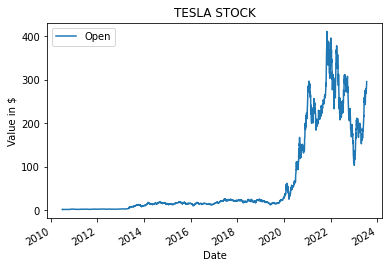

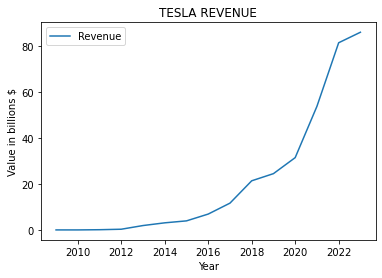

In [38]:
tesla_stock.reset_index(inplace=True)
tesla_stock.plot(x="Date", y="Open", title="TESLA STOCK", ylabel="Value in $" )
#tesla_data_frame.reset_index(inplace=True)
tesla_data_frame.plot(x="Year", y="Revenue", title="TESLA REVENUE", ylabel="Value in billions $" )

## GameStop Stock and Revenue Dashboard

<Axes: title={'center': 'GameStop Market Cap'}, xlabel='Year', ylabel='Value in billions $'>

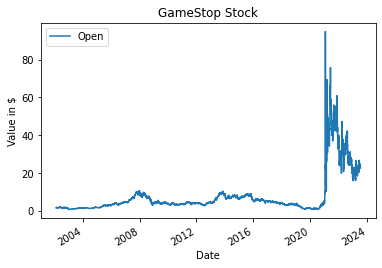

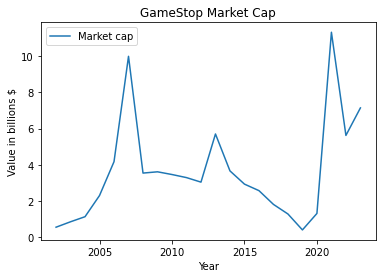

In [37]:
GameStop_stock.reset_index(inplace=True)
GameStop_stock.plot(x="Date", y="Open", title="GameStop Stock", ylabel="Value in $")
GameStop_data_frame.plot(x="Year", y="Market cap", title="GameStop Market Cap", ylabel="Value in billions $")